<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#understanding-data">Understanding the Data</a></li>
        <li><a href="https://#reading_data">Reading the Data in</a></li>
        <li><a href="https://#multiple_regression_model">Multiple Regression Model</a></li>
        <li><a href="https://#prediction">Prediction</a></li>
        <li><a href="https://#practice">Practice</a></li>
    </ol>
</div>
<br>
<hr>


### Importing Needed packages


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

<h2 id="understanding_data">Understanding the Data</h2>


We have downloaded a fuel consumption dataset, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

*   **MODELYEAR** e.g. 2014  any del model
*   **MAKE** e.g. Acura      fabricant
*   **MODEL** e.g. ILX       model
*   **VEHICLE CLASS** e.g. SUV   tipus de vechicle
*   **ENGINE SIZE** e.g. 4.7     mida motor
*   **CYLINDERS** e.g 6          cilindres
*   **TRANSMISSION** e.g. A6     Sistema de transmission 
*   **FUELTYPE** e.g. z          tipo de combustible 
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9     consumo de combustible en ciudad   
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9     consum combustible carretera 
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2       PEINE DE CONSUMO DE COMBUSTIBLE
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0   emisiones de c02


<h2 id="reading_data">Reading the data in</h2>


In [4]:
df = pd.read_csv("/Users/pere amat/CE/PIA/EJER_REGRESION/multiple/dataset_vehicles (2).csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Let's select some features that we want to use for regression.


In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


Let's plot Emission values with respect to Engine size:


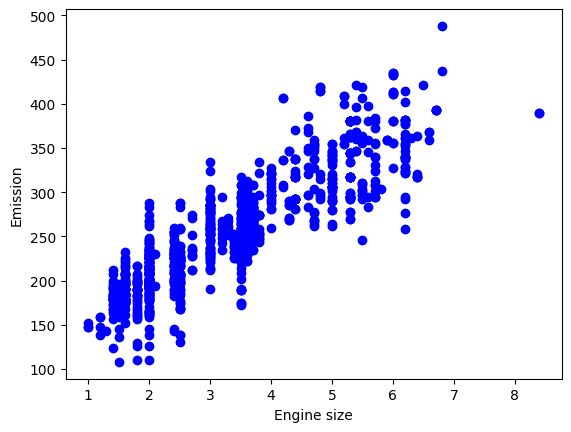

In [4]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

En este gràfico de dispersión podemos observar una tendencia ascendente en relación a la mida del motor y las emissiones, és decir como masgrande
sea el motor màs emissiones en c02.

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. Around 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using the  **np.random.rand()** function:


In [5]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Train data distribution


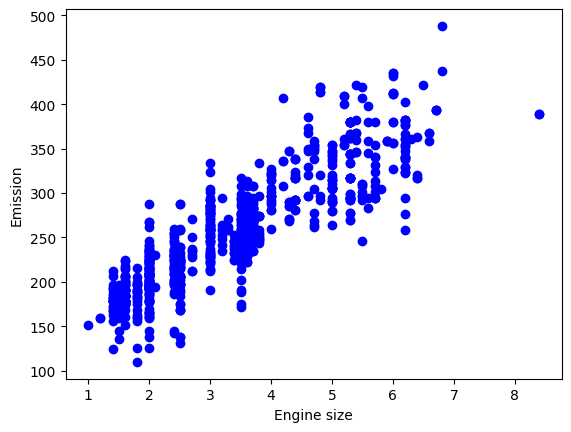

In [6]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [22]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score


<h2 id="multiple_regression_model">Multiple Regression Model</h2>


In [24]:

x = cdf.drop(columns = ['CO2EMISSIONS'])
y = cdf['CO2EMISSIONS']


In [26]:
mlr = LinearRegression()


In [42]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [34]:
mlr.fit(x_train,y_train)

LinearRegression()

In [38]:
y_pred = mlr.predict(x_test)


In [70]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(r2)
print(mae)
print(mse)
print(rmse)

0.8763308442525604
16.689747234417517
511.3652187280231
22.61338583069822


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Ahora lo que voy ha hacer es una matriz de correlacion aver cual esta mas correlacionada con la variable objetivo y de ahi hare la preddiccion

In [84]:
cdf.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,1.000000


Ahora lo que voy a hacer es ver si con menos datos puedo mejorar las preddiciones del modelo FUELCONSUMPTION_CITY, FUELCONSUMPTION_COMB, ENGINESIZE

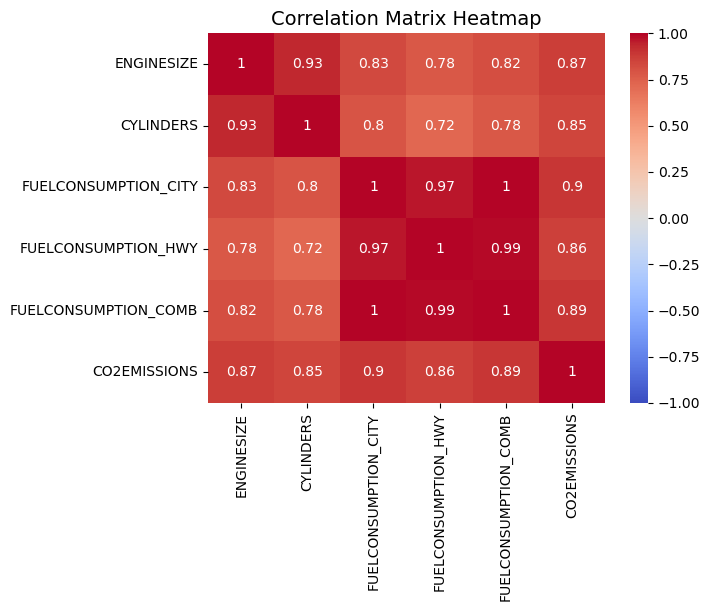

In [88]:
sns.heatmap(cdf.corr(), annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)

plt.title('Correlation Matrix Heatmap', fontsize=14)
plt.show()

In [94]:

x = cdf[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB', 'ENGINESIZE']]
y = cdf['CO2EMISSIONS']


In [96]:
mlr2 = LinearRegression()


In [98]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [100]:
mlr2.fit(x_train,y_train)

LinearRegression()

In [104]:
y_pred = mlr2.predict(x_test)


In [106]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(r2)
print(mae)
print(mse)
print(rmse)

0.8706641088620517
16.904578624356215
534.7968607160965
23.125675356972746


In [ ]:
como vemos l

<h2 id="prediction">Prediction</h2>
